In [29]:
import pandas as pd
import numpy as np
from sklearn.metrics import make_scorer, f1_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

import pickle

In [19]:
df = pd.read_csv("heart.csv")

X = df.drop('output', axis=1)  # Features
y = df['output']               # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [20]:
#for some reason, pickling breaks the svm model, so we'll train it independently

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix
import seaborn as sns
import pickle

# Create a pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),  
    ('svc', SVC(probability=True)) 
])

# Define a parameter grid
param_grid = {
    'svc__kernel': ['linear', 'rbf', 'poly'],  
    'svc__C': [0.1, 1, 10],                    
    'svc__gamma': ['scale', 'auto']            
}


grid_search = GridSearchCV(pipe, param_grid, scoring='f1', cv=5)


grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best f1:", grid_search.best_score_)

best_model_svm = grid_search.best_estimator_

with open('svm_model.pkl', 'wb') as f:
    pickle.dump(best_model_svm, f)

y_pred_svm = best_model_svm.predict(X_test)

Best parameters: {'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Best f1: 0.8355063910612358


In [21]:
#Oscar's model also breaks witih pickle so we'll train it manually

from sklearn.naive_bayes import GaussianNB

pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('model', GaussianNB()) 
])

param_grid = {
    'model__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='recall')

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Recall Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import recall_score
test_recall = recall_score(y_test, y_pred)
print("Recall on Test Set:", test_recall)

gnb_model = best_model

Best Parameters: {'model__var_smoothing': 1e-09}
Best Recall Score: 0.8190883190883189
Recall on Test Set: 0.84375


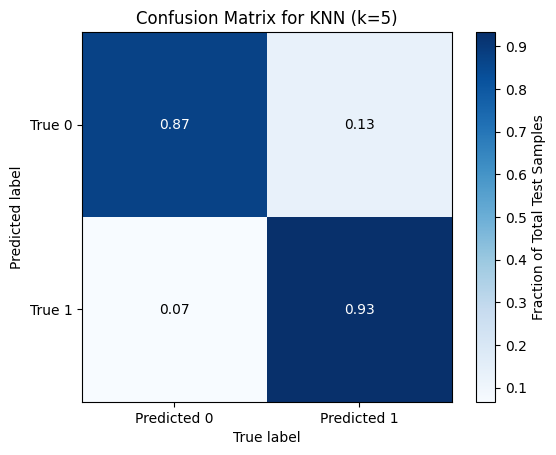

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN classifier
k = 5  # Number of neighbors

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features by removing the mean and scaling to unit variance
    ('knn', KNeighborsClassifier(n_neighbors=k))  # k-NN classifier
])



# Train the classifier
knn_pipeline.fit(X_train_scaled, y_train)

# Predict on the test set
knn_y_pred = knn_pipeline.predict(X_test_scaled)

cm = confusion_matrix(y_pred, y_test)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for KNN (k={})'.format(k))
cbar = plt.colorbar()
cbar.set_label('Fraction of Total Test Samples')
plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
plt.yticks([0, 1], ['True 0', 'True 1'])
plt.xlabel('True label')
plt.ylabel('Predicted label')

thresh = cm_normalized.max() / 2.
for i in range(cm_normalized.shape[0]):
    for j in range(cm_normalized.shape[1]):
        plt.text(j, i, format(cm_normalized[i, j], '.2f'),
                 ha="center", va="center",
                 color="white" if cm_normalized[i, j] > thresh else "black")

plt.show()

In [22]:
#gnb_model = pickle.load(open("gnb_model.pkl", 'rb'))
gradient_boosting_model = pickle.load(open("gradient_boosting_model.pkl", 'rb'))
logistic_regression_model = pickle.load(open("logistic_regression_model.pkl", 'rb'))
#svm_model = pickle.load(open("svm_model.pkl", 'rb'))
svm_model = best_model_svm
knn_model = pickle.load(open("knn_model.pkl", 'rb'))

models = {
    "Gaussian Naive Bayes": gnb_model,
    "Gradient Boosting": gradient_boosting_model,
    "Logistic Regression": logistic_regression_model,
    "SVM": svm_model,
    "KNN": knn_model
}

Gaussian Naive Bayes - F1 Score: 0.0, AUC: 0.70


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


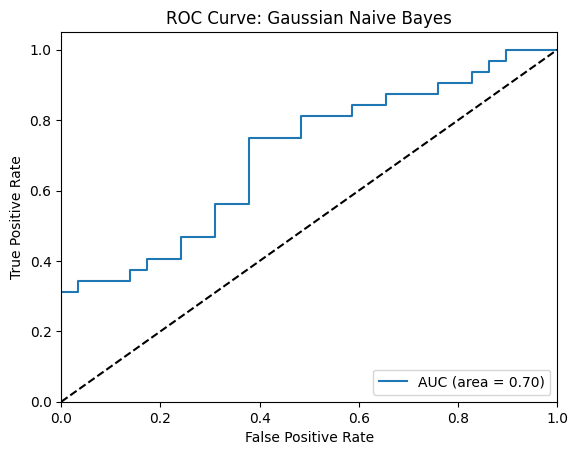

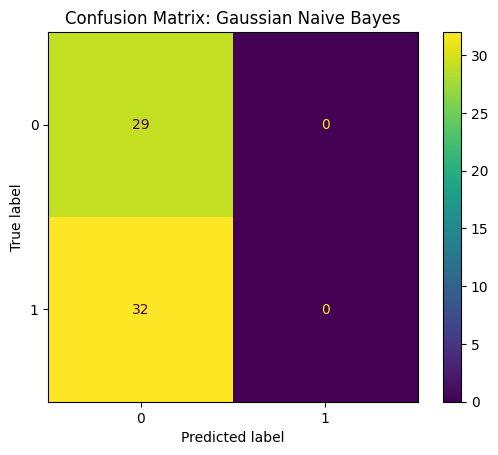

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


Gradient Boosting - F1 Score: 0.7671232876712328, AUC: 0.84


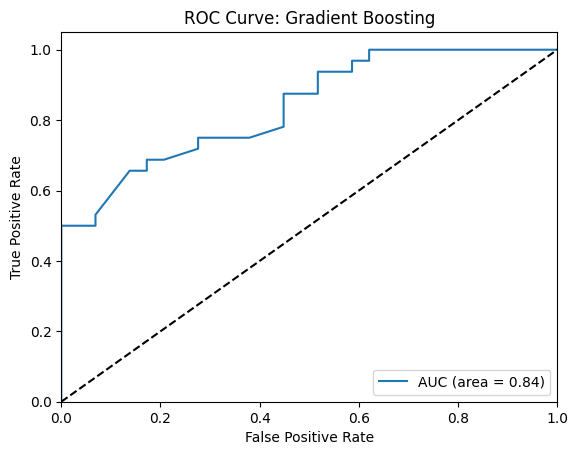

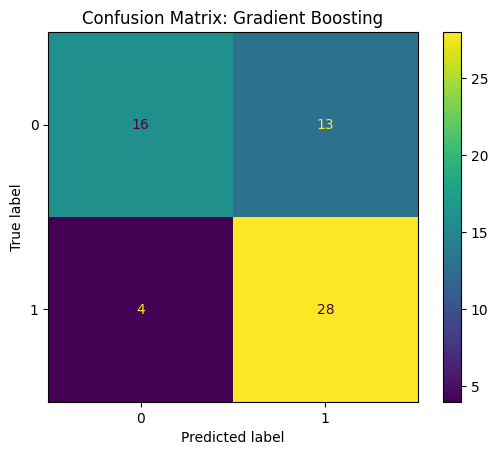

Logistic Regression - F1 Score: 0.8253968253968254, AUC: 0.90


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


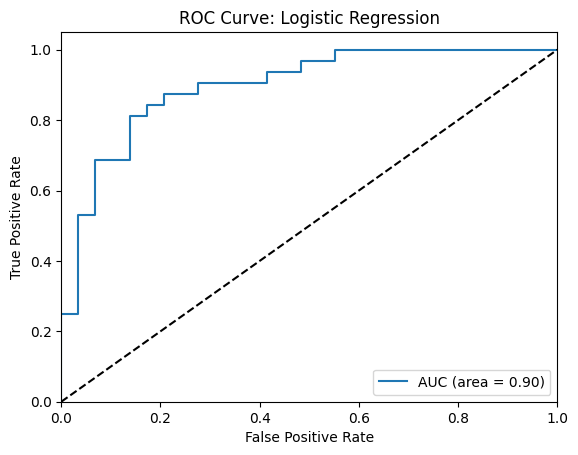

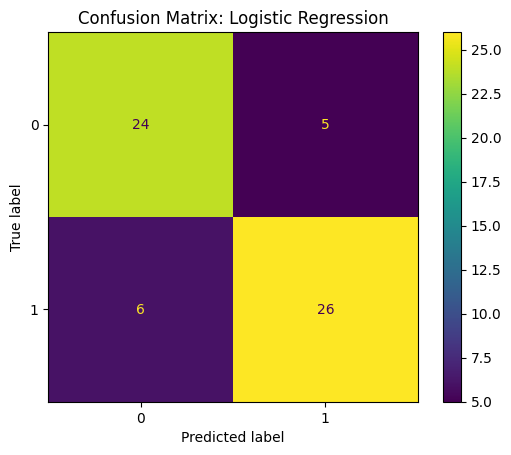

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


SVM - F1 Score: 0.6881720430107527, AUC: 0.50


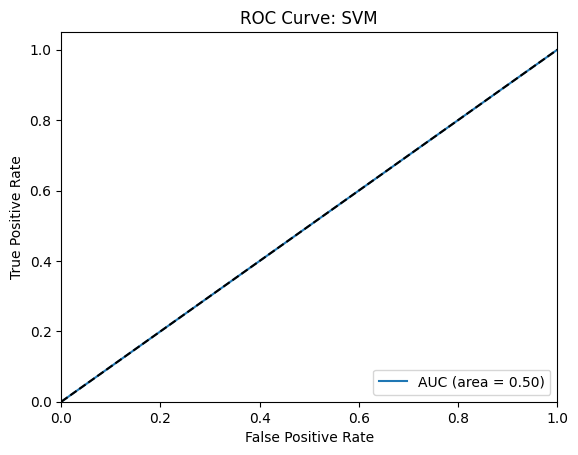

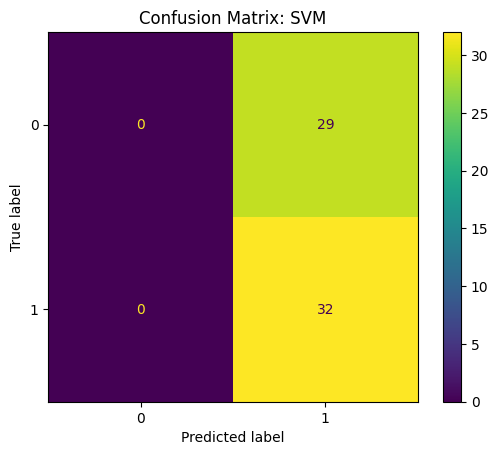

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay

# Define a function to evaluate and plot for each model
def evaluate_model(model, X_test, y_test, model_name):
    # Predict on the test data
    y_pred = model.predict(X_test)
    
    # Try to calculate probability estimates for AUC
    try:
        y_pred_prob = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_pred_prob)
        print(f"{model_name} - F1 Score: {f1_score(y_test, y_pred)}, AUC: {auc:.2f}")
        
        # Plot ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        plt.figure()
        plt.plot(fpr, tpr, label=f'AUC (area = {auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve: {model_name}')
        plt.legend(loc="lower right")
        plt.show()
    except AttributeError:
        print(f"{model_name} - F1 Score: {f1_score(y_test, y_pred)}")
        print(f"No AUC score for {model_name} as predict_proba is not available.")

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()

    return y_pred

# Evaluate each model
gnb_ypred = evaluate_model(gnb_model, X_test_scaled, y_test, "Gaussian Naive Bayes")
gbm_ypred = evaluate_model(gradient_boosting_model, X_test_scaled, y_test, "Gradient Boosting")
lr_ypred = evaluate_model(logistic_regression_model, X_test_scaled, y_test, "Logistic Regression")
svm_ypred = evaluate_model(svm_model, X_test_scaled, y_test, "SVM")
#knn_ypred = evaluate_model(knn_model, X_test_scaled, y_test, "KNN")

In [36]:
def majority_vote(*predictions):
    """
    Takes multiple arrays of predictions and returns an array of final predictions
    based on majority vote.
    """
    # Stack predictions for easy column-wise comparison
    prediction_matrix = np.column_stack(predictions)

    # Apply majority vote logic
    majority_vote_predictions = np.apply_along_axis(
        lambda x: np.argmax(np.bincount(x)), axis=1, arr=prediction_matrix
    )

    return majority_vote_predictions

#Not including Oscar's GNB gave better results - possibly overfit
final_predictions = majority_vote(gbm_ypred, lr_ypred, y_pred_svm, knn_y_pred)

Final Ensemble - F1 Score: 0.8888888888888888
Final Ensemble - AUC: 0.8857758620689655


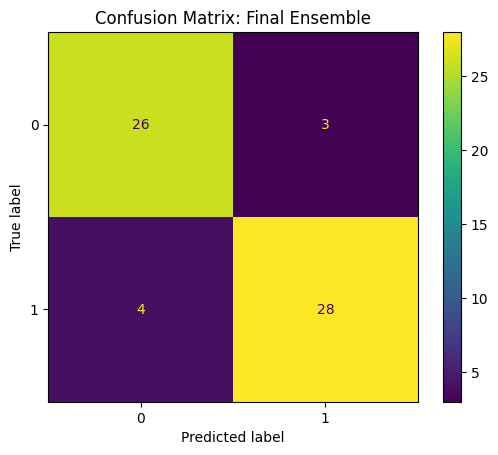

In [37]:
print("Final Ensemble - F1 Score:", f1_score(y_test, final_predictions))
print("Final Ensemble - AUC:", roc_auc_score(y_test, final_predictions))

# Plot the confusion matrix for the final ensemble
cm = confusion_matrix(y_test, final_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix: Final Ensemble')
plt.show()

In [ ]:
#Best F1 Score and Confusion Matrix from Ensemble Model